In [1]:
import math   
import numpy as np 
import librosa
import matplotlib.pyplot as plt

from scipy.io.wavfile import write

import os

import scipy.io.wavfile as wav

from tqdm import tqdm

from python_speech_features import mfcc
from python_speech_features import logfbank

from matplotlib import cm


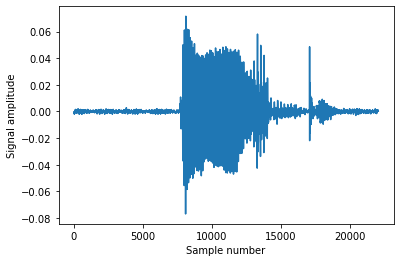

22050


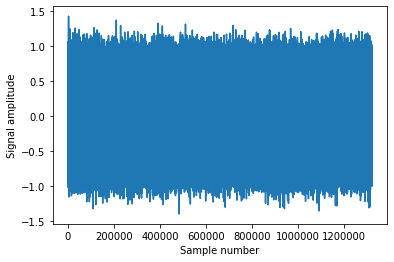

In [23]:
signal, sr = librosa.load("speech_commands/bed/00f0204f_nohash_0.wav")

plt.plot(signal)
plt.xlabel("Sample number")
plt.ylabel("Signal amplitude")
plt.show()

(rate,sig) = wav.read("speech_commands/bed/00f0204f_nohash_0.wav")
mfcc_feat = mfcc(sig,rate)

noise, sr = librosa.load("_background_noise_/white_noise.wav")

(rate,sig) = wav.read("_background_noise_/white_noise.wav")
mfcc_feat = mfcc(sig,rate)

print(sr)
plt.plot(noise)
plt.xlabel("Sample number")
plt.ylabel("Signal amplitude")
plt.show()

# Add a subset of noise to the audio file
if(len(noise)>len(signal)):
    noise=noise[0:len(signal)]
                
# Get desired ammount of noise based upon the SNR and input audio
noise=get_noise_from_sound(signal,noise,SNR=10)
                
# Scale signal
signal_noise=signal+noise



write("test.wav",sr,signal_noise)

mfcc_feat = mfcc(signal_noise,sr,nfft=551)


In [24]:
mfcc_feat.shape

(99, 13)

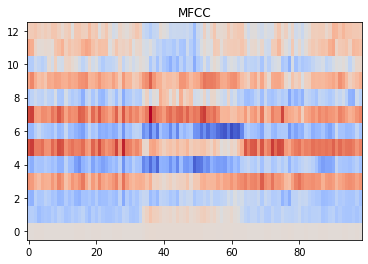

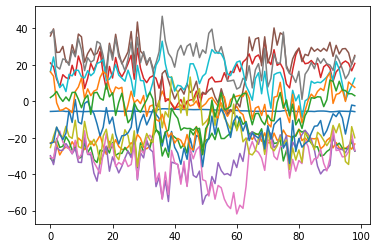

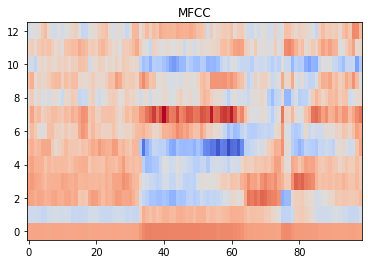

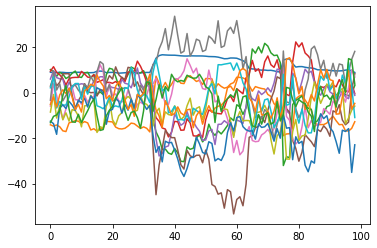

In [26]:
(rate,sig) = wav.read("test.wav")
mfcc_feat = mfcc(sig,rate,nfft=551)
# mfcc_feat = logfbank(sig,rate)

ig, ax = plt.subplots()
mfcc_data= np.swapaxes(mfcc_feat, 0 ,1)
cax = ax.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower', aspect='auto')
ax.set_title('MFCC')
#Showing mfcc_data
plt.show()
#Showing mfcc_feat
plt.plot(mfcc_feat)
plt.show()


(rate,sig) = wav.read("speech_commands/bed/00f0204f_nohash_0.wav")
mfcc_feat = mfcc(sig,rate,nfft=551)

ig, ax = plt.subplots()
mfcc_data= np.swapaxes(mfcc_feat, 0 ,1)
cax = ax.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower', aspect='auto')
ax.set_title('MFCC')
#Showing mfcc_data
plt.show()
#Showing mfcc_feat
plt.plot(mfcc_feat)
plt.show()

In [2]:
# Shoutout to the author of: https://github.com/sleekEagle/audio_processing/blob/master/mix_noise.py

#given a signal, noise (audio) and desired SNR, this gives the noise (scaled version of noise input) that gives the desired SNR
def get_noise_from_sound(signal,noise,SNR):
    RMS_s=math.sqrt(np.mean(signal**2))
    #required RMS of noise
    RMS_n=math.sqrt(RMS_s**2/(pow(10,SNR/10)))
    
    #current RMS of noise
    RMS_n_current=math.sqrt(np.mean(noise**2))
    noise=noise*(RMS_n/RMS_n_current)
    
    return noise

#***convert complex np array to polar arrays (2 apprays; abs and angle)
def to_polar(complex_ar):
    return np.abs(complex_ar),np.angle(complex_ar)

In [6]:
# os.listdir("_background_noise_")

for folder_name in os.listdir("speech_commands"):
    os.mkdir("noise_dataset/" + folder_name)

In [9]:
# Select only whitenoise for noise
noise_file= 'other_data/_background_noise_/white_noise.wav'

# Get audio and signal rate
noise, sr = librosa.load(noise_file)

# Scale noise
noise=np.interp(noise, (noise.min(), noise.max()), (-1, 1))

# List all speech folders and respective files
for keyword_dir in tqdm(os.listdir("speech_commands")):
    print(f"Generating noise for keyword: {keyword_dir}")
    for file in os.listdir(f"speech_commands/{keyword_dir}"):
        if file.endswith(".wav"):
            
            # No noise addition
            if np.random.uniform() < 0.2:
                
                # Retrieve signal and signal rate
                signal, sr = librosa.load(f"speech_commands/{keyword_dir}/{file}")
                
                # Scale signal
                signal=np.interp(signal, (signal.min(), signal.max()), (-1, 1))
                
                # Write audio file without added noise
                write("noise_dataset/"+keyword_dir + "/" + file,sr,signal)
            
            # Noise addition
            else:
                
                # Retrieve signal and signal rate
                signal, sr = librosa.load(f"speech_commands/{keyword_dir}/{file}")
                
                # Scale signal
                signal=np.interp(signal, (signal.min(), signal.max()), (-1, 1))
                filename = str(file)
                
                # Add a subset of noise to the audio file
                if(len(noise)>len(signal)):
                    noise_new=noise[0:len(signal)]
                
                # Get desired ammount of noise based upon the SNR and input audio
                noise_new=get_noise_from_sound(signal,noise_new,SNR=10)
                
                # Scale signal
                signal_noise=signal+noise_new
                
                # Write audio file with added noise
                write("noise_dataset/"+keyword_dir + "/" + "noise_" + file,sr,signal_noise)

  0%|          | 0/35 [00:00<?, ?it/s]

Generating noise for keyword: left


  3%|▎         | 1/35 [01:14<42:20, 74.72s/it]

Generating noise for keyword: stop


  6%|▌         | 2/35 [02:34<41:50, 76.09s/it]

Generating noise for keyword: five


  9%|▊         | 3/35 [03:56<41:32, 77.90s/it]

Generating noise for keyword: seven


 11%|█▏        | 4/35 [05:15<40:28, 78.33s/it]

Generating noise for keyword: down


 14%|█▍        | 5/35 [06:40<40:07, 80.24s/it]

Generating noise for keyword: house


 17%|█▋        | 6/35 [07:21<33:08, 68.58s/it]

Generating noise for keyword: happy


 20%|██        | 7/35 [08:04<28:24, 60.88s/it]

Generating noise for keyword: three


 23%|██▎       | 8/35 [09:22<29:40, 65.95s/it]

Generating noise for keyword: yes


 26%|██▌       | 9/35 [10:54<31:58, 73.80s/it]

Generating noise for keyword: backward


 29%|██▊       | 10/35 [11:31<26:09, 62.77s/it]

Generating noise for keyword: go


 31%|███▏      | 11/35 [12:58<28:01, 70.05s/it]

Generating noise for keyword: cat


 34%|███▍      | 12/35 [13:45<24:12, 63.14s/it]

Generating noise for keyword: wow


 37%|███▋      | 13/35 [14:30<21:12, 57.85s/it]

Generating noise for keyword: six


 40%|████      | 14/35 [15:58<23:20, 66.68s/it]

Generating noise for keyword: four


 43%|████▎     | 15/35 [17:22<23:58, 71.93s/it]

Generating noise for keyword: nine


 46%|████▌     | 16/35 [18:47<24:02, 75.92s/it]

Generating noise for keyword: bird


 49%|████▊     | 17/35 [19:34<20:10, 67.26s/it]

Generating noise for keyword: two


 51%|█████▏    | 18/35 [21:02<20:49, 73.53s/it]

Generating noise for keyword: up


 54%|█████▍    | 19/35 [22:39<21:29, 80.56s/it]

Generating noise for keyword: sheila


 57%|█████▋    | 20/35 [23:24<17:25, 69.68s/it]

Generating noise for keyword: eight


 60%|██████    | 21/35 [24:51<17:29, 74.96s/it]

Generating noise for keyword: visual


 63%|██████▎   | 22/35 [25:25<13:36, 62.84s/it]

Generating noise for keyword: marvin


 66%|██████▌   | 23/35 [26:12<11:36, 58.02s/it]

Generating noise for keyword: tree


 69%|██████▊   | 24/35 [26:49<09:28, 51.64s/it]

Generating noise for keyword: zero


 71%|███████▏  | 25/35 [28:18<10:29, 62.91s/it]

Generating noise for keyword: forward


 74%|███████▍  | 26/35 [28:50<08:01, 53.48s/it]

Generating noise for keyword: learn


 77%|███████▋  | 27/35 [29:22<06:17, 47.20s/it]

Generating noise for keyword: dog


 80%|████████  | 28/35 [30:06<05:22, 46.06s/it]

Generating noise for keyword: no


 83%|████████▎ | 29/35 [31:29<05:44, 57.34s/it]

Generating noise for keyword: right


 86%|████████▌ | 30/35 [32:50<05:21, 64.39s/it]

Generating noise for keyword: bed


 89%|████████▊ | 31/35 [33:34<03:53, 58.30s/it]

Generating noise for keyword: follow


 91%|█████████▏| 32/35 [34:10<02:34, 51.42s/it]

Generating noise for keyword: off


 94%|█████████▍| 33/35 [35:32<02:01, 60.76s/it]

Generating noise for keyword: on


 97%|█████████▋| 34/35 [37:10<01:11, 71.90s/it]

Generating noise for keyword: one


100%|██████████| 35/35 [38:28<00:00, 65.96s/it]
